In [1]:
import numpy
import pandas

# Activating plotting
import matplotlib.pyplot as plt
%matplotlib inline

# things we already know
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# things we learn today
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR

## Loading data

again, let's use wines dataset

In [2]:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
y = data['quality'].values
X = data.drop('quality', axis=1)

In [3]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0


In [4]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42)

## Constant prediction

metric of interest is `mean_squared_error`, which should be minimized

In [5]:
numpy.mean(trainY) # optimal grade is mean grade

5.8687721208821131

In [6]:
mean_squared_error(testY, numpy.zeros(len(testY)) + numpy.mean(trainY) )

0.77767392527381973

## Linear models

In [7]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX)) 

0.0 	0.564587791519
0.001 	0.568293991144
0.01 	0.573570550784
0.1 	0.574990791682
1 	0.575287625141
10 	0.576469007479
100 	0.593064358623


## Linear models with non linear features

first normalizing features, then applying non-linear transformations

In [8]:
from sklearn.preprocessing import StandardScaler
# first, standatize all features by scaling (mean = 0, std = 1)
scaler = StandardScaler()
scaler.fit(X) # compute means and variance, compute transformation parameters 
X_extend = scaler.transform(X) # transform to get (mean = 0, std = 1)
X_extend = pandas.DataFrame(X_extend, columns=X.columns) # convert to pandas and return names to columns

In [9]:
for f in X_extend.columns:
    # some quessed features
    X_extend[f + '_abs']  = numpy.abs(X_extend[f])
    X_extend[f + '_tanh'] = numpy.tanh(X_extend[f])

In [10]:
X_extend.shape

(4898, 33)

In [11]:
trainX_extended, testX_extended = train_test_split(X_extend, random_state=42)

In [12]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX_extended, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX_extended)) 

0.0 	0.516931032212
0.001 	0.516931019462
0.01 	0.516930904672
0.1 	0.516929753694
1 	0.516918023577
10 	0.516826197999
100 	0.518524350888


## Short summary

- nonlinear features can improve quality of linear models
    - good features will certainly do
- more features can be handled with regularization
    - even more than number of observations

## Decision tree 

<img src='http://cdn.edureka.co/blog/wp-content/uploads/2015/01/tree2.png' width=600 />

## Decision Tree for regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(min_samples_leaf=20)
tree_reg.fit(trainX, trainY) # build a tree
predicted_test_grades = tree_reg.predict(testX)
print mean_squared_error(testY, predicted_test_grades)

0.51874480275


### Plotting decision rules

decision rule is piecewise-constant

In [14]:
# Create a random dataset. This is the way to get repropducible 
rng = numpy.random.RandomState(1)
X_toy = numpy.sort(5 * rng.rand(80, 1), axis=0)
y_toy = numpy.sin(X_toy).ravel() + rng.laplace(size=80) * 0.2

In [15]:
# loading additional functions from utils.py
# those will help with visualization
from utils import plot_regressor_decision, plot_classifier_decision, plot_regressor_decision_2d

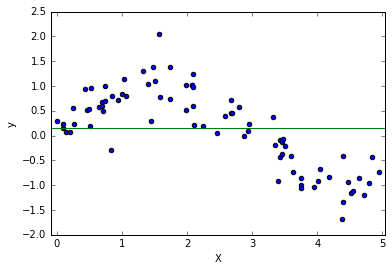

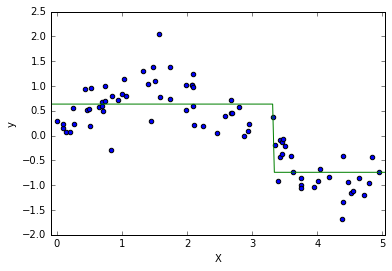

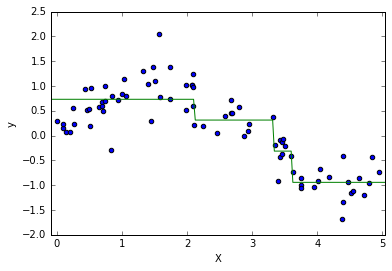

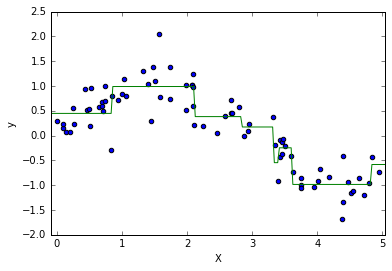

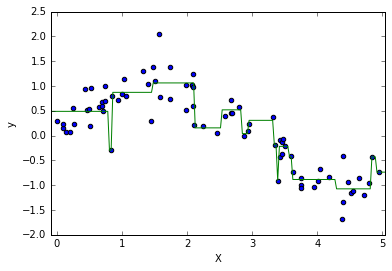

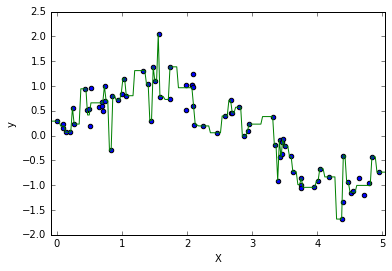

In [16]:
# replacement for 0-depth tree in the demo
from sklearn.dummy import DummyRegressor
tree_reg = DummyRegressor().fit(X_toy, y_toy)
plot_regressor_decision(tree_reg, X_toy, y_toy)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

for depth in [1, 2, 3, 4, 8]:
    tree_reg = DecisionTreeRegressor(max_depth=depth).fit(X_toy, y_toy)
    plot_regressor_decision(tree_reg, X_toy, y_toy)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

## Decision trees for classification

(<matplotlib.text.Text at 0x7f8653f413d0>,
 <matplotlib.text.Text at 0x7f8653f52550>)

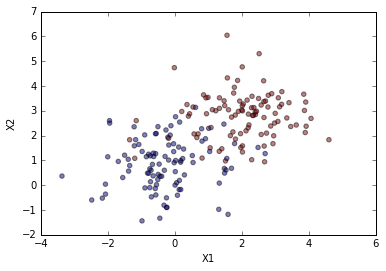

In [17]:
# generate two classes with features
from sklearn.datasets import make_blobs

X_toy, y_toy = make_blobs(n_samples=200, centers=[[0, 1], [2, 3]], random_state=14)
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.5)
plt.xlabel('X1'), plt.ylabel('X2')

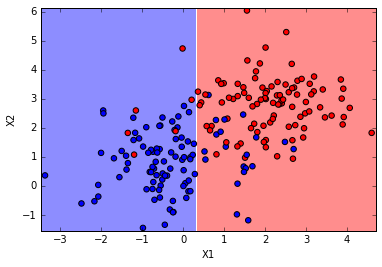

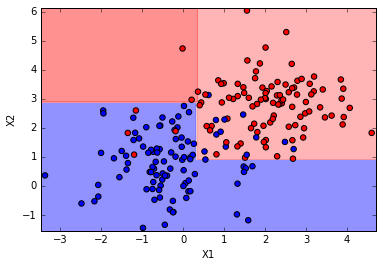

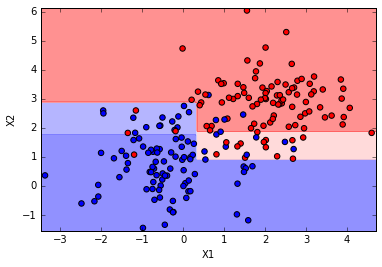

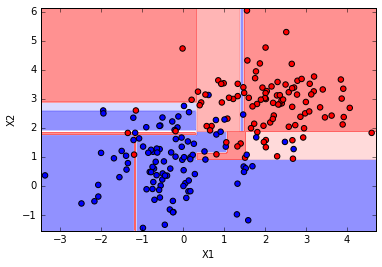

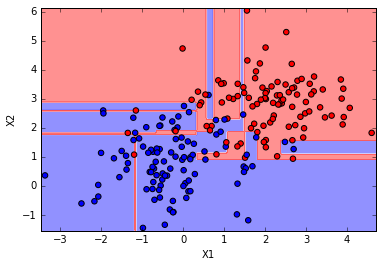

In [18]:
for depth in [1, 2, 3, 5, 10]:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_toy, y_toy)
    plot_classifier_decision(tree_clf, X_toy, y_toy)
    plt.xlabel('X1'), plt.ylabel('X2')
    plt.show()

# Pre-stopping

**Exercise:** provide similar plots for min_samples_leaf=1, 2, 3, 5, 10

## Notes on Decision Tree:

- independent on features scale
- during classification decision tree returns probability
- pre-stopping matters (`max_depth`, `min_samples_leaf`)

## Logistic regression

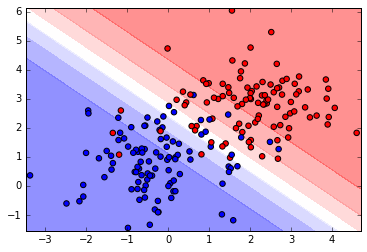

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_toy, y_toy)
plot_classifier_decision(clf, X_toy, y_toy)

## SVM + RBF kernel (generalized linear model)

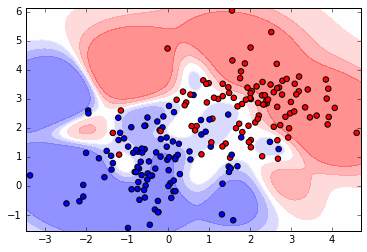

In [20]:
clf = SVC(C=10000., probability=True).fit(X_toy, y_toy) # C is inverse regularization
plot_classifier_decision(clf, X_toy, y_toy)

To get an idea of adding new features for linear models: https://www.youtube.com/watch?v=3liCbRZPrZA

# Back to wines

## KNN 

In [21]:
for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbours)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX)) 

1 0.774693877551
2 0.672857142857
3 0.648526077098
5 0.644897959184
7 0.646697209496
10 0.636065306122
20 0.637524489796
50 0.657922612245


In [22]:
# define weight for each sample depending on its distance
def my_distance_function(distances):
    return (1. + distances) ** (-2)

for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbours, weights=my_distance_function)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX))

1 0.774693877551
2 0.612036916536
3 0.563940292579
5 0.528197975204
7 0.520313098314
10 0.502240780366
20 0.495320989021
50 0.509391945293


In [23]:
for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(metric='canberra', n_neighbors=n_neighbours)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX)) 

1 0.623673469388
2 0.575510204082
3 0.526258503401
5 0.49946122449
7 0.507871720117
10 0.504236734694
20 0.506251020408
50 0.525772734694


## Pipelines with Standard Scaler

first standardize each variable, then use simple kNN. 
Standardizing can be done with `StandardScaler` separately or one can build it into pipeline. 

In [24]:
from sklearn.pipeline import make_pipeline

# pipeline: Standardize features, then apply kNN regression.
knn_pipe_reg = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
knn_pipe_reg.fit(trainX, trainY)

print 'train', mean_squared_error(testY, knn_pipe_reg.predict(testX))
print 'test', mean_squared_error(trainY, knn_pipe_reg.predict(trainX))

train 0.479053061224
test 0.339047100463


(2, 9)

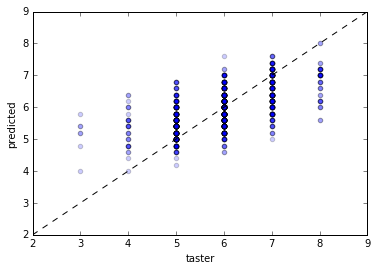

In [25]:
plt.scatter(testY, knn_pipe_reg.predict(testX), alpha=0.2)
plt.plot([2, 9], [2, 9], 'k--')
plt.xlabel('taster'), plt.ylabel('predicted')
plt.xlim(2, 9)
plt.ylim(2, 9)

## Combining predictions

In [26]:
regressors = [
    DecisionTreeRegressor(max_depth=6),
    KNeighborsRegressor(metric='canberra', n_neighbors=5),
]

for reg in regressors:
    reg.fit(trainX, trainY)
    print mean_squared_error(testY, reg.predict(testX)), reg

0.536658053917 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
0.49946122449 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='canberra',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


**Averaging** predictions. We could use different coefficient to mix results

In [27]:
print mean_squared_error(testY, sum(reg.predict(testX) for reg in regressors) / len(regressors))
# print mean_squared_error(trainY, sum(reg.predict(trainX) for reg in regressors) / len(regressors))

0.458375344797


## kFolding 

One of cross-validation strategies, each sample is used once in testing

In [28]:
from sklearn.cross_validation import KFold

qualities = []
for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]

    tree_reg = DecisionTreeRegressor(max_depth=10)
    tree_reg.fit(fold_trainX, fold_trainY)
    qualities.append(mean_squared_error(fold_testY, tree_reg.predict(fold_testX)))
    
print qualities
print numpy.mean(qualities)

[0.81009233487297305, 0.90274582115854052, 0.71308490228427668, 0.77258684592364413, 0.61610937194483373]
0.762923855237


# Homework (due to 30 Jan 23:59)

** Exercise #0. (2 points)** Compare using kFold which algorithm gives more stable (= less variation in MSE on testing) result: decision tree or linear regression?

** Exercise #1. (1 point)** Fine-tune the regression decision tree. Achieve minimal MSE using kFold cross-validation.
   Parameters to tune: `max_depth, min_samples_split, min_samples_leaf`

** Exercise #2. (2 point)** Split the data into two parts (50% each), on each part train a decision tree (with any parameters) and compare the structure of trees. Are they similar? <br /> (Below you have the code to display tree's structure)

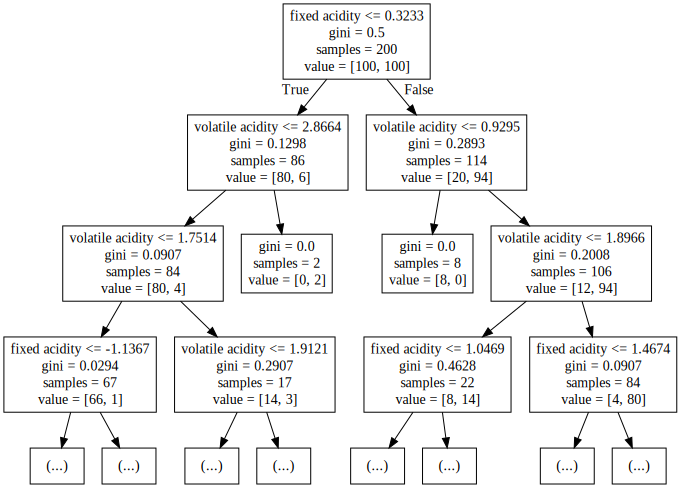

In [29]:
import pydot_ng
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import SVG

def plot_tree(tree, columns, max_depth):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=columns, max_depth=max_depth)
    graph = pydot_ng.graph_from_dot_data(dot_data.getvalue())
    return SVG(graph.create_svg())

# If you have own installation of python, this may require installing graphviz and pydot-ng
plot_tree(tree_clf, X.columns, max_depth=3)

** Exercise #3. (2 point)** Mix up knn, ridge with non-linear features and a decision tree. Find appropriate coefficients in linear combination to get minimal MSE on a holdout.

# Completed?
Rename the notebook to `3.2-Surname-trees.ipynb`, download (`File > Download as .ipynb`) and send to `icl.ml@yandex.ru` with topic `2-Surname`